In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

In [3]:
data

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1


In [4]:
data.head(10)

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0
5,39,1,3,120,339,0,0,170,0,0.0,1,0
6,45,0,2,130,237,0,0,170,0,0.0,1,0
7,54,1,2,110,208,0,0,142,0,0.0,1,0
8,37,1,4,140,207,0,0,130,1,1.5,2,1
9,48,0,2,120,284,0,0,120,0,0.0,1,0


In [5]:
data.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [6]:
data.columns

Index(['age', 'sex', 'chest pain type', 'resting bp s', 'cholesterol',
       'fasting blood sugar', 'resting ecg', 'max heart rate',
       'exercise angina', 'oldpeak', 'ST slope', 'target'],
      dtype='object')

In [7]:
data.shape


(1190, 12)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [9]:
# Define categorical columns
categorical_columns = ['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'ST slope', 'target']

# Convert categorical columns to 'category' dtype
for col in categorical_columns:
    data[col] = data[col].astype('category')

# Verify the conversion
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   age                  1190 non-null   int64   
 1   sex                  1190 non-null   category
 2   chest pain type      1190 non-null   category
 3   resting bp s         1190 non-null   int64   
 4   cholesterol          1190 non-null   int64   
 5   fasting blood sugar  1190 non-null   category
 6   resting ecg          1190 non-null   category
 7   max heart rate       1190 non-null   int64   
 8   exercise angina      1190 non-null   category
 9   oldpeak              1190 non-null   float64 
 10  ST slope             1190 non-null   category
 11  target               1190 non-null   category
dtypes: category(7), float64(1), int64(4)
memory usage: 55.8 KB
None


In [10]:
# Get descriptive statistics for numerical features
print(data.describe())

# Get descriptive statistics for categorical features
print(data.describe(include=['category']))


               age  resting bp s  cholesterol  max heart rate      oldpeak
count  1190.000000   1190.000000  1190.000000     1190.000000  1190.000000
mean     53.720168    132.153782   210.363866      139.732773     0.922773
std       9.358203     18.368823   101.420489       25.517636     1.086337
min      28.000000      0.000000     0.000000       60.000000    -2.600000
25%      47.000000    120.000000   188.000000      121.000000     0.000000
50%      54.000000    130.000000   229.000000      140.500000     0.600000
75%      60.000000    140.000000   269.750000      160.000000     1.600000
max      77.000000    200.000000   603.000000      202.000000     6.200000
         sex  chest pain type  fasting blood sugar  resting ecg  \
count   1190             1190                 1190         1190   
unique     2                4                    2            3   
top        1                4                    0            0   
freq     909              625                  936       

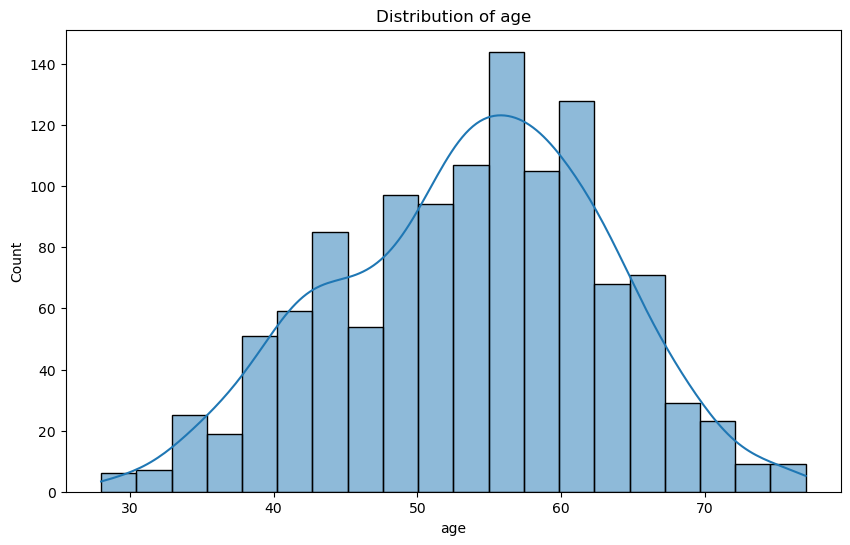

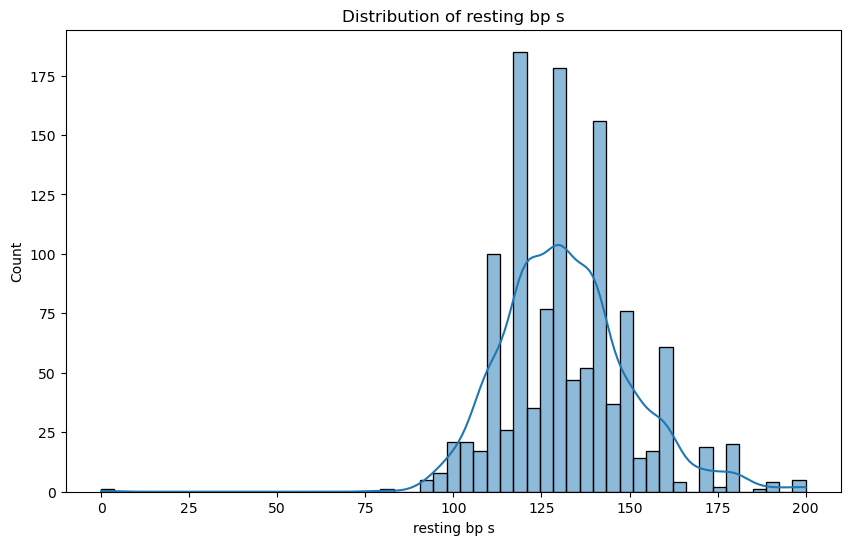

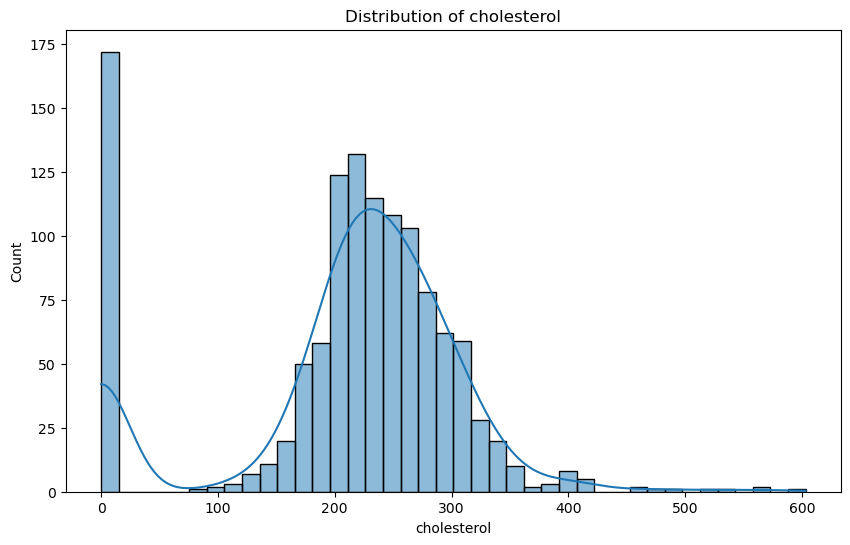

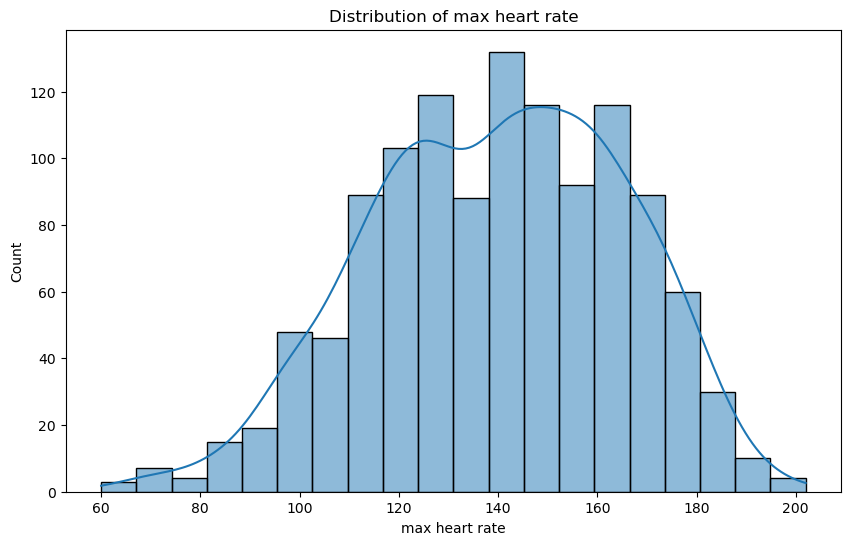

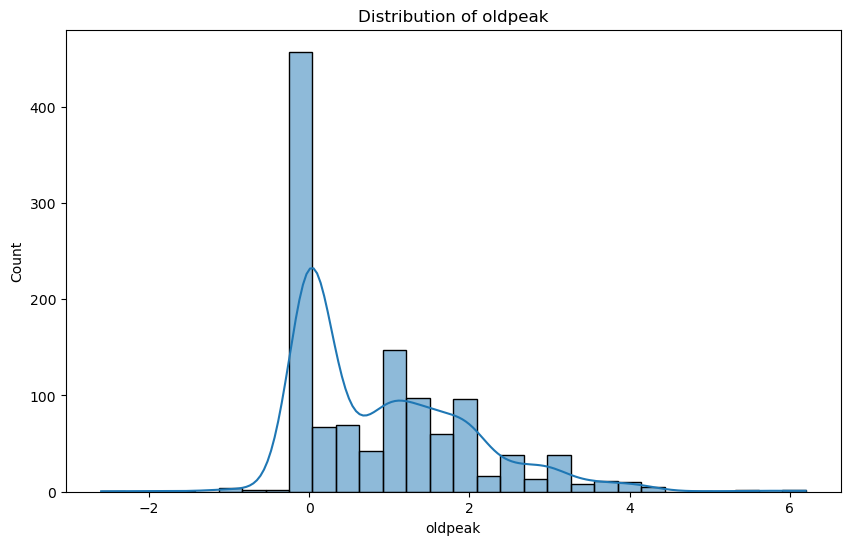

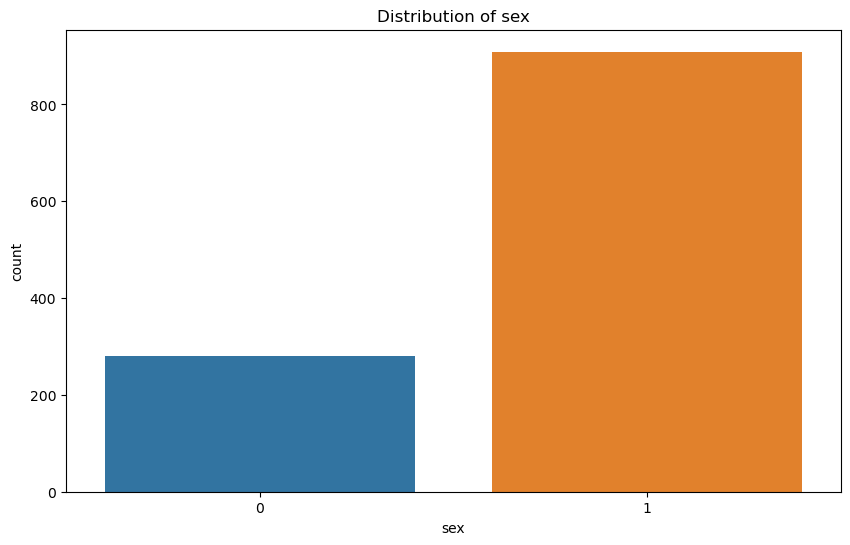

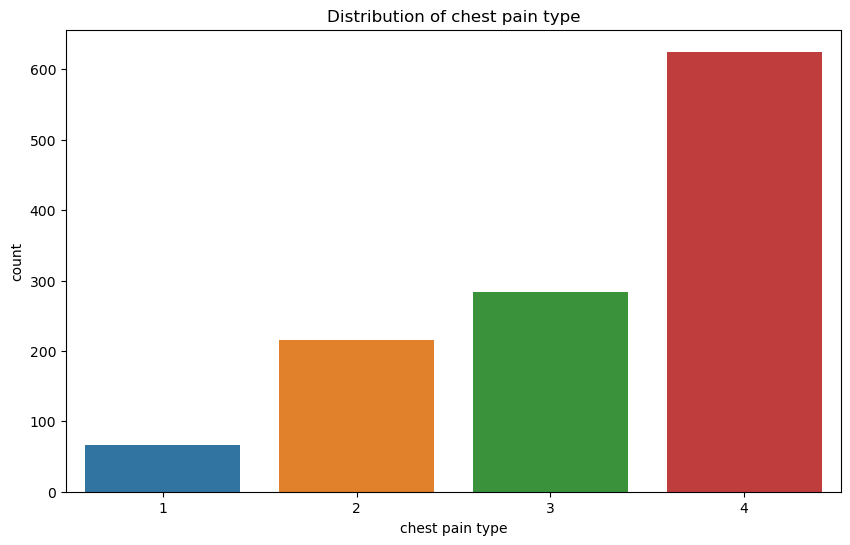

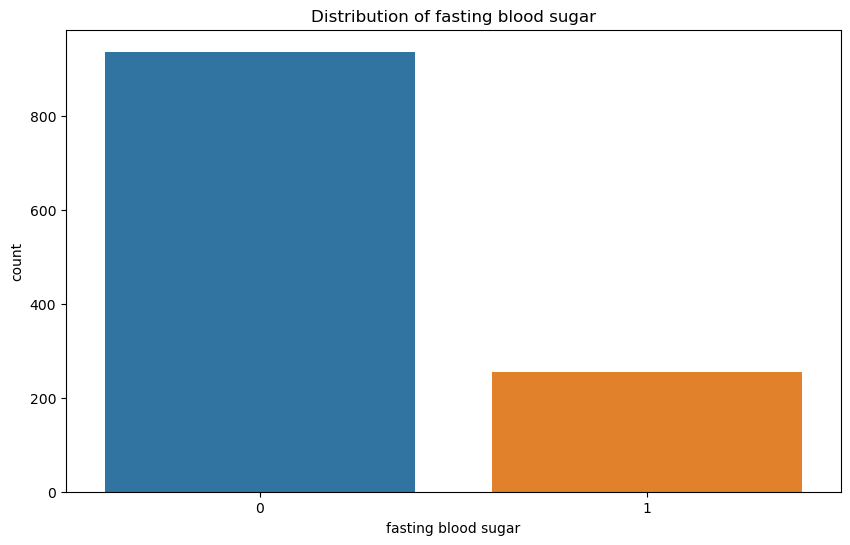

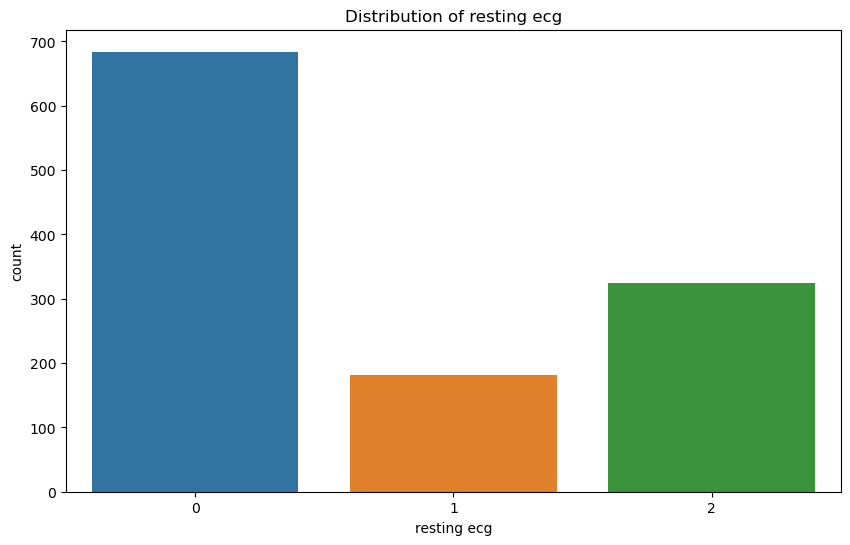

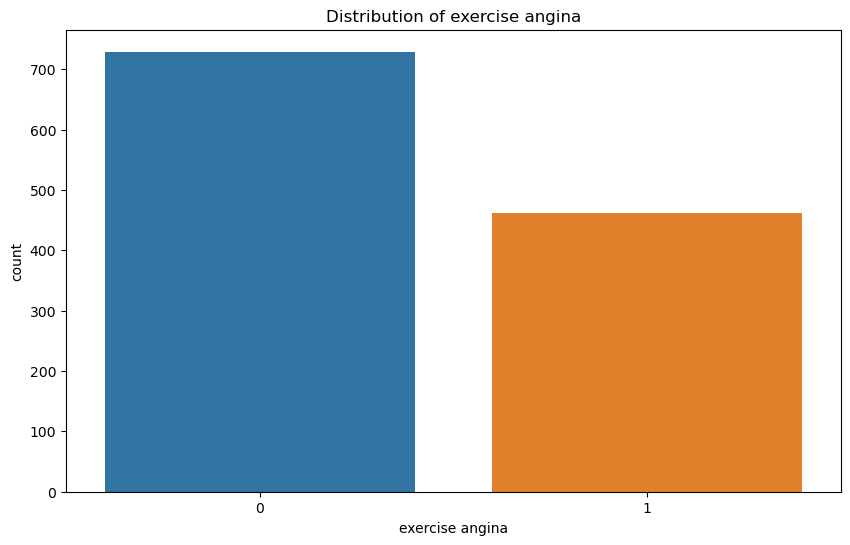

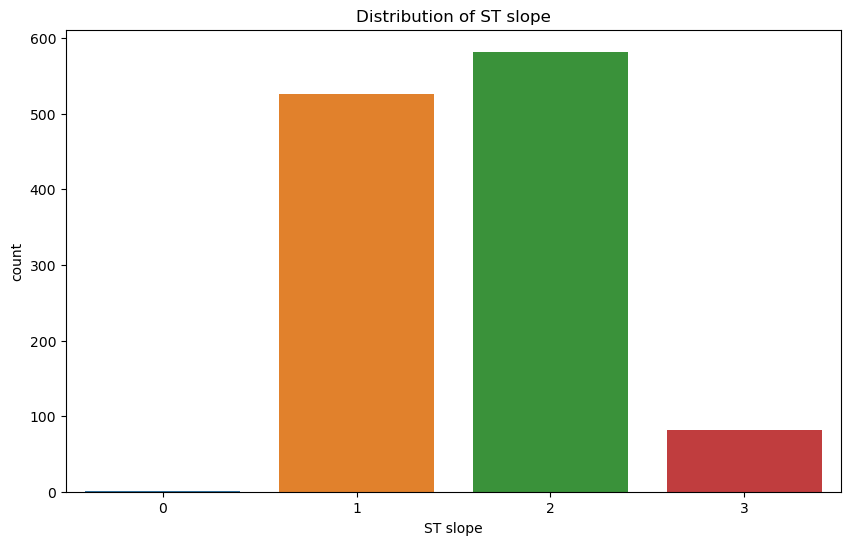

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize distribution of numerical features
numerical_features = ['age', 'resting bp s', 'cholesterol', 'max heart rate', 'oldpeak']
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

# Visualize distribution of categorical features
categorical_features = ['sex', 'chest pain type', 'fasting blood sugar', 'resting ecg', 'exercise angina', 'ST slope']
for feature in categorical_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=data[feature])
    plt.title(f'Distribution of {feature}')
    plt.show()


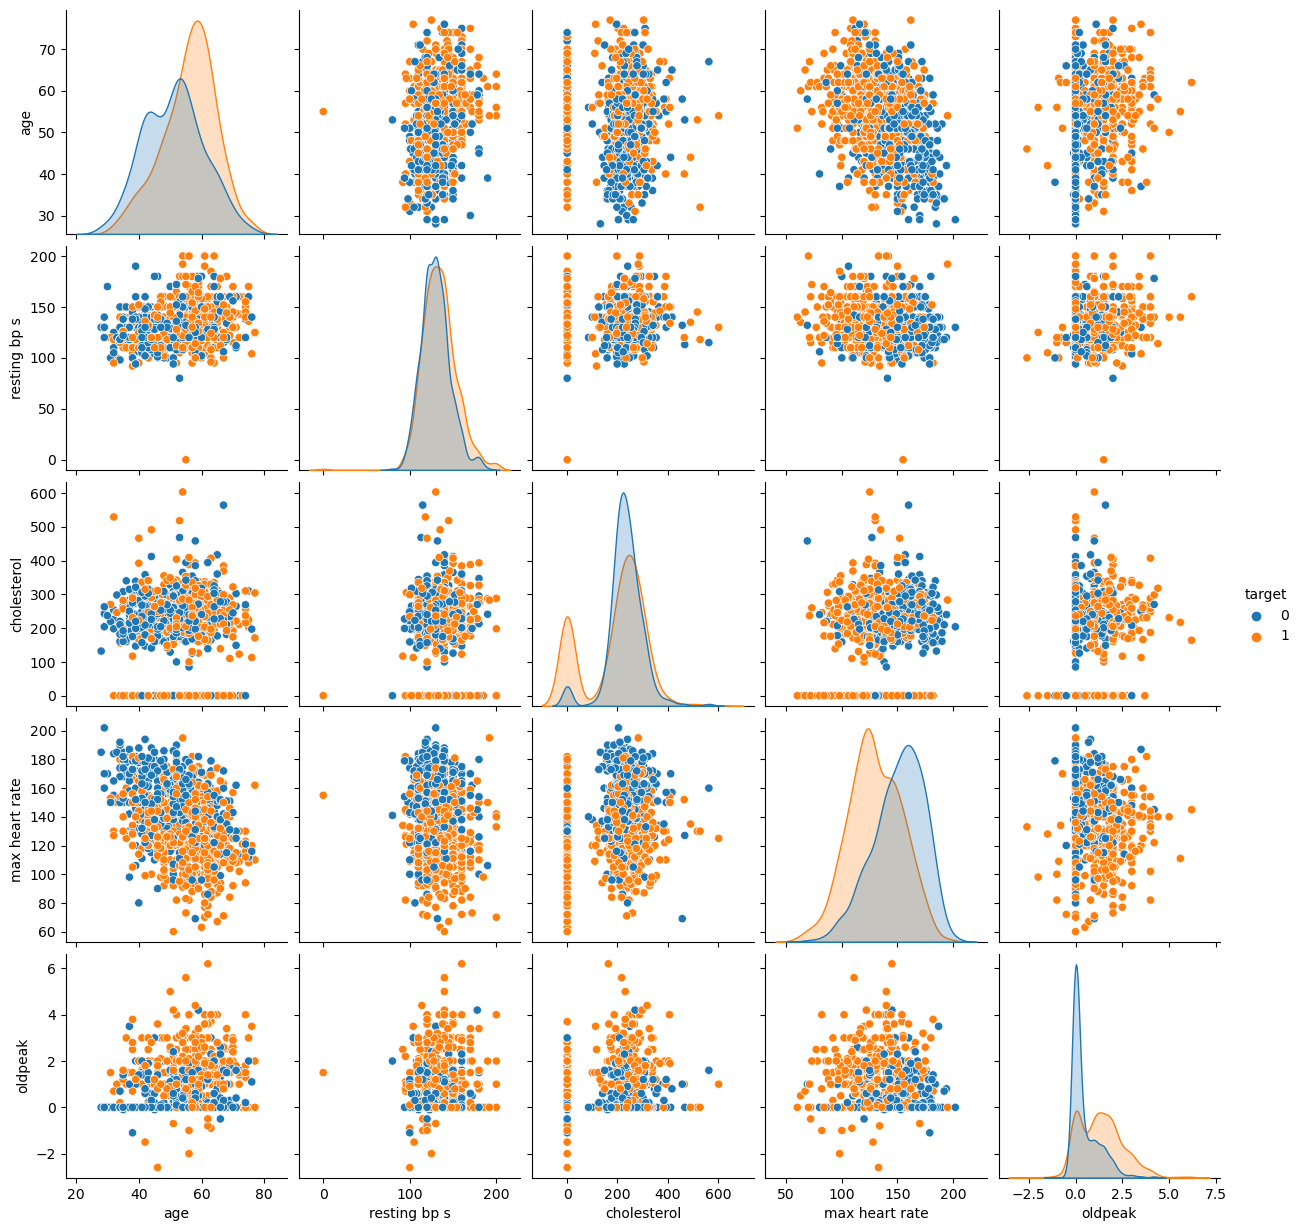

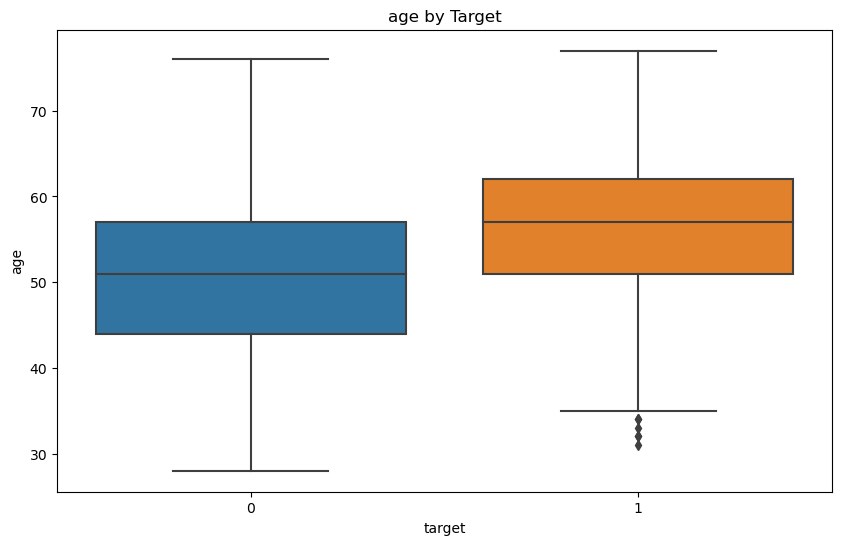

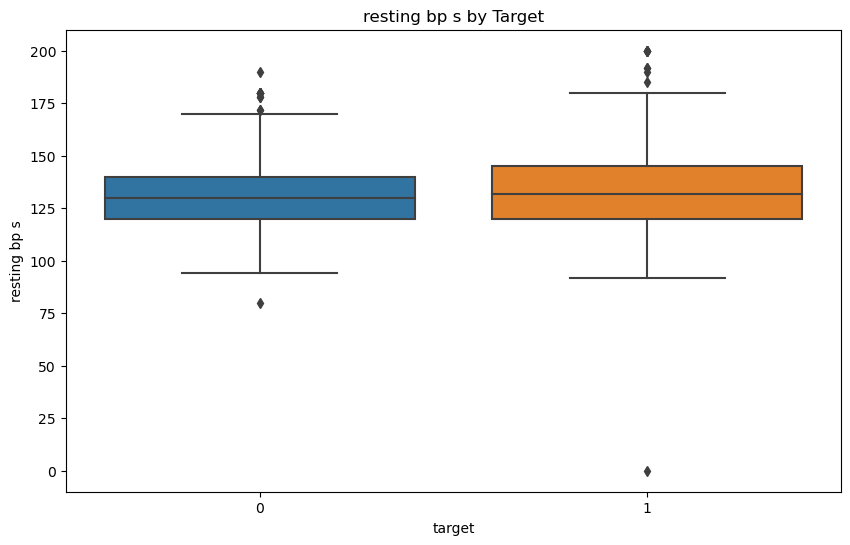

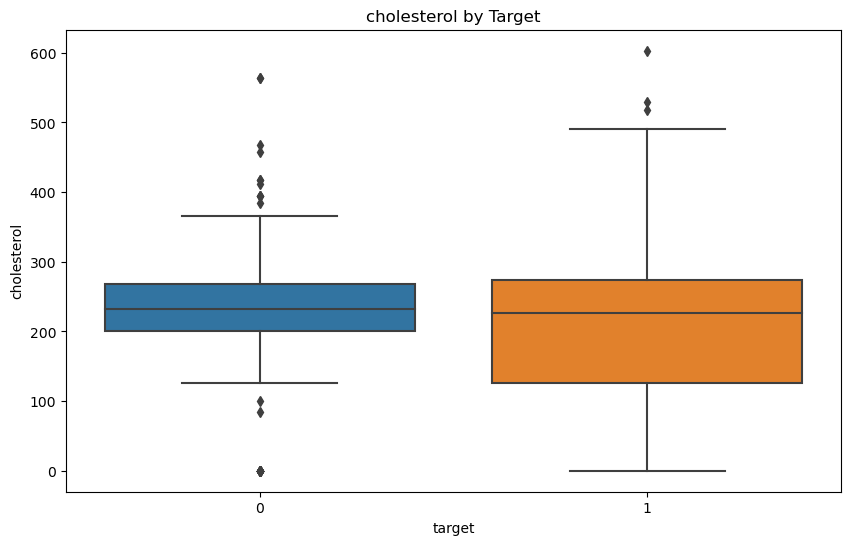

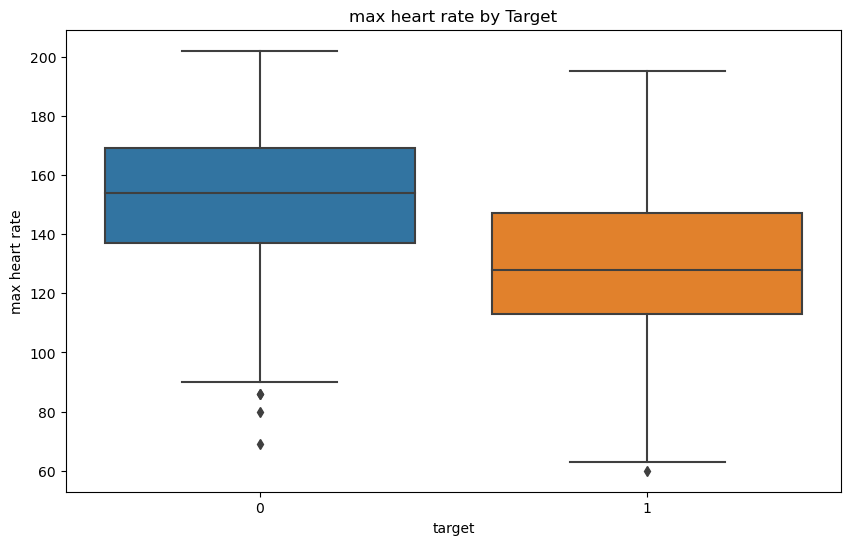

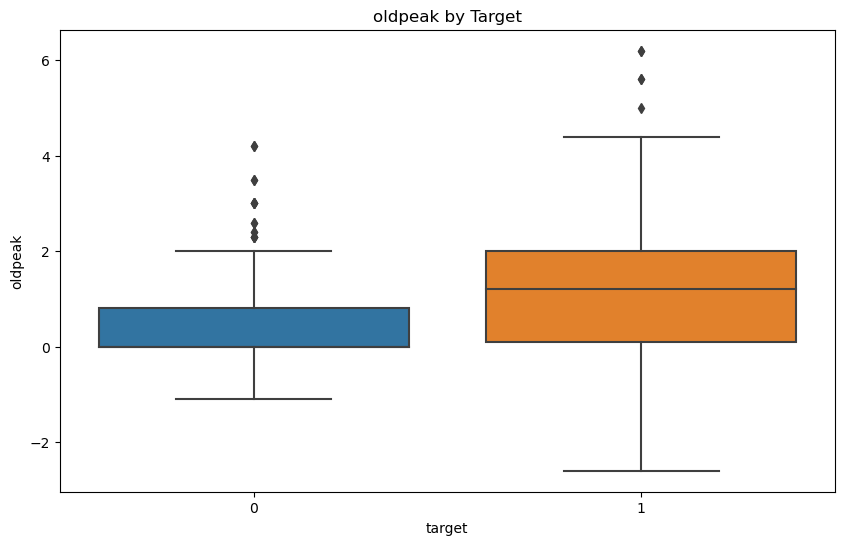

In [12]:
# Pairplot to visualize relationships between features and target
sns.pairplot(data, hue='target')
plt.show()

# Boxplot to visualize the relationship between numerical features and target
for feature in numerical_features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='target', y=feature, data=data)
    plt.title(f'{feature} by Target')
    plt.show()


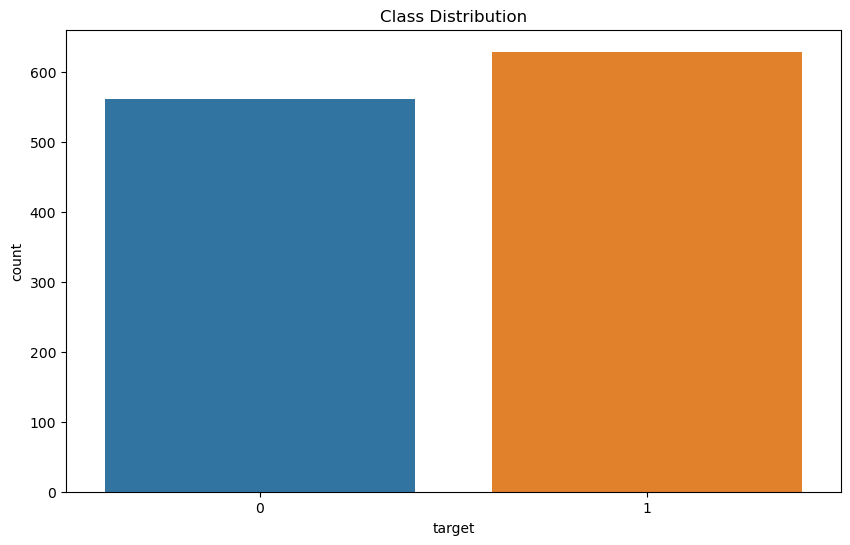

target
1    629
0    561
Name: count, dtype: int64


In [13]:
# Visualize class distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='target', data=data)
plt.title('Class Distribution')
plt.show()

# Print class distribution
print(data['target'].value_counts())


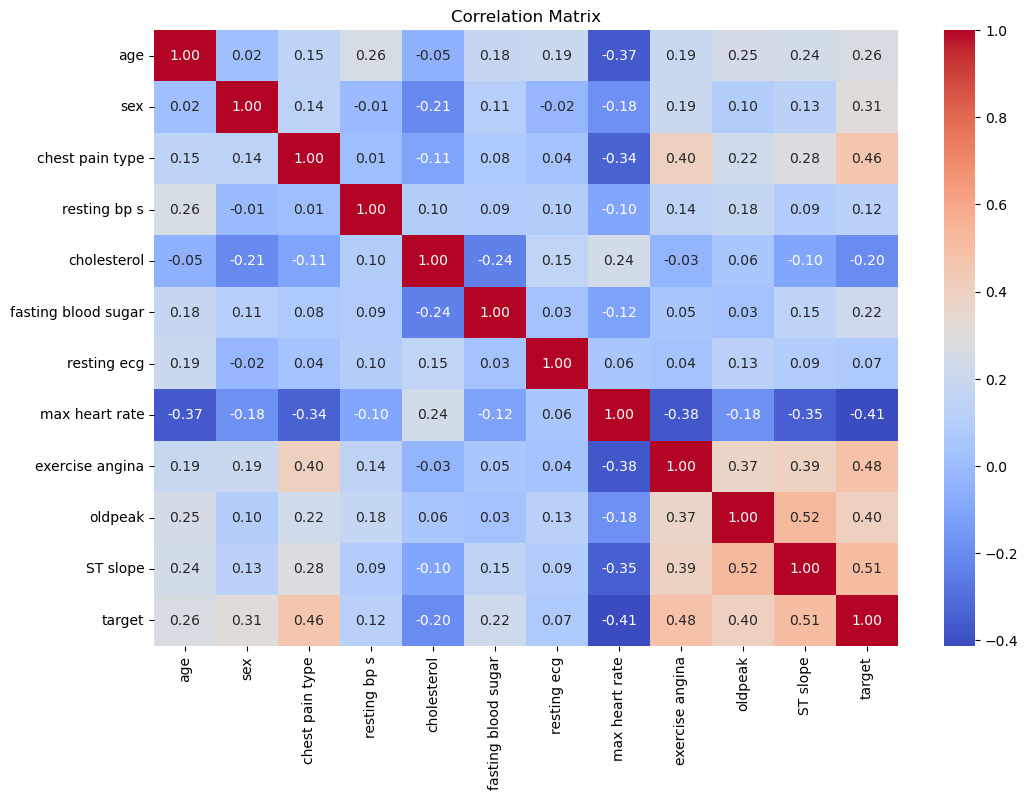

In [14]:
# Calculate correlation matrix
corr_matrix = data.corr()

# Display correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


In [15]:
import pandas as pd
import numpy as np


In [16]:
df=pd.read_csv('heart_statlog_cleveland_hungary_final.csv')

In [17]:
print(df.head)

<bound method NDFrame.head of       age  sex  chest pain type  resting bp s  cholesterol  \
0      40    1                2           140          289   
1      49    0                3           160          180   
2      37    1                2           130          283   
3      48    0                4           138          214   
4      54    1                3           150          195   
...   ...  ...              ...           ...          ...   
1185   45    1                1           110          264   
1186   68    1                4           144          193   
1187   57    1                4           130          131   
1188   57    0                2           130          236   
1189   38    1                3           138          175   

      fasting blood sugar  resting ecg  max heart rate  exercise angina  \
0                       0            0             172                0   
1                       0            0             156                0   


In [18]:
# Check if the 'Target' variable is continuous or categorical
target_type = "Regression" if data['target'].dtype == 'float64' else "Classification"
print("Task Type:", target_type)

Task Type: Classification


In [19]:
x= data.iloc[:, 0:11]
y= data.iloc[:,11]

In [20]:
print(x)

      age sex chest pain type  resting bp s  cholesterol fasting blood sugar  \
0      40   1               2           140          289                   0   
1      49   0               3           160          180                   0   
2      37   1               2           130          283                   0   
3      48   0               4           138          214                   0   
4      54   1               3           150          195                   0   
...   ...  ..             ...           ...          ...                 ...   
1185   45   1               1           110          264                   0   
1186   68   1               4           144          193                   1   
1187   57   1               4           130          131                   0   
1188   57   0               2           130          236                   0   
1189   38   1               3           138          175                   0   

     resting ecg  max heart rate exerci

In [21]:
print(y)

0       0
1       1
2       0
3       1
4       0
       ..
1185    1
1186    1
1187    1
1188    1
1189    0
Name: target, Length: 1190, dtype: category
Categories (2, int64): [0, 1]


In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.2, random_state=100)

In [24]:
print("x_train")
print(x_train)
print("x_test")
print(x_test)

x_train
      age sex chest pain type  resting bp s  cholesterol fasting blood sugar  \
1124   46   1               4           120          249                   0   
910    58   1               3           132          224                   0   
530    72   1               4           143          211                   0   
163    49   0               2           110          208                   0   
919    64   1               3           140          335                   0   
...   ...  ..             ...           ...          ...                 ...   
802    43   1               3           130          315                   0   
53     41   0               2           130          245                   0   
350    36   1               4           110            0                   1   
79     49   1               4           130          206                   0   
792    62   0               4           138          294                   1   

     resting ecg  max heart rat

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target
X = df.drop('target', axis=1)
y = df['target']

# Split the data into training and test sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features (mean=0, variance=1)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

# Instantiate the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(probability=True),
    'k-Nearest Neighbors': KNeighborsClassifier()
}


In [28]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score

# Function to train and evaluate models
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, 'predict_proba') else None
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else None
    return acc, prec, rec, f1, cm, roc_auc

# Evaluate all models
results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, X_train, y_train, X_test, y_test)

# Display results
for name, (acc, prec, rec, f1, cm, roc_auc) in results.items():
    print(f"Model: {name}")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}" if roc_auc is not None else "")
    print(f"Confusion Matrix:\n{cm}\n")


Model: Logistic Regression
Accuracy: 0.8613
Precision: 0.8712
Recall: 0.8779
F1 Score: 0.8745
ROC AUC Score: 0.9088
Confusion Matrix:
[[ 90  17]
 [ 16 115]]

Model: Decision Tree
Accuracy: 0.8950
Precision: 0.9344
Recall: 0.8702
F1 Score: 0.9012
ROC AUC Score: 0.8977
Confusion Matrix:
[[ 99   8]
 [ 17 114]]

Model: Random Forest
Accuracy: 0.9370
Precision: 0.9328
Recall: 0.9542
F1 Score: 0.9434
ROC AUC Score: 0.9703
Confusion Matrix:
[[ 98   9]
 [  6 125]]

Model: Support Vector Machine
Accuracy: 0.8908
Precision: 0.8671
Recall: 0.9466
F1 Score: 0.9051
ROC AUC Score: 0.9476
Confusion Matrix:
[[ 88  19]
 [  7 124]]

Model: k-Nearest Neighbors
Accuracy: 0.8866
Precision: 0.8714
Recall: 0.9313
F1 Score: 0.9004
ROC AUC Score: 0.9379
Confusion Matrix:
[[ 89  18]
 [  9 122]]



In [29]:
from sklearn.model_selection import GridSearchCV

# Example: Hyperparameter tuning for RandomForestClassifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation Score: {best_score:.4f}")


Best Parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Cross-Validation Score: 0.9107


In [30]:
import joblib

# Select the best model (e.g., RandomForest with the best parameters)
best_model = RandomForestClassifier(**best_params)
best_model.fit(X_train, y_train)

# Save the model
joblib.dump(best_model, 'best_model.pkl')

# Load the model for future use
loaded_model = joblib.load('best_model.pkl')

# Predict on new data
new_predictions = loaded_model.predict(X_test)


In [31]:
# Example: Evaluate the deployed model on the test set to monitor performance
y_test_pred = loaded_model.predict(X_test)
test_acc = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_acc:.4f}")


Test Accuracy: 0.9412
